In [1]:
# 회귀분석
from keras.models import Sequential # keras models 서브패키지
from keras.layers import Dense      # layers => 모델구성
from sklearn.datasets import make_regression
# 신경망 - 정규화
from sklearn.preprocessing import MinMaxScaler

X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1) # X = 100x2, y = 100

# 값의 범위가 다름
scalarX, scalarY = MinMaxScaler(), MinMaxScaler() # data 값의 범위가 다르므로 Minmax 두 번 사용
scalarX.fit(X)
scalarY.fit(y.reshape(100,1)) # y는 열로 나오기 때문에 행으로 변형
X = scalarX.transform(X)
y = scalarY.transform(y.reshape(100, 1))

# keras model 시작
# 망만 생성 100x2
model = Sequential()
# dense : FFNN
model.add(Dense(4, input_dim=2, activation='relu')) # 4 : 출력 차수 , 가중치(2x4) => 100x4
# layer depth 1
model.add(Dense(4, activation='relu')) # 100x4 가중치(4x4) => 100x4 
# layer depth 2
model.add(Dense(1, activation='linear')) # 100x4 가중치(4x1) => 100x1, 예측
# layer depth 3
# 전 layer에서 계산된 것이 다음 layer에서 적용

# backend가 tensorflow
# loss : mse(회귀), cross enthropy, KL-divergence(GAN) : 분포를 비교
model.compile(loss='mse', optimizer='adam') # tensorflow 모델로 변환
model.fit(X, y, epochs=1000, verbose=0) # tensorflow에서 minimize는 for문 두개 첫번쨰는 epoch 두번째는 batch_size-> 이걸 한번에 하는 함수
# verbose = 학습 중 출력되는 문구를 설정합니다.
# - 0 : 아무 것도 출력하지 않습니다.
# - 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
# - 2 : 미니 배치마다 손실 정보를 출력합니다.
Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
Xnew = scalarX.transform(Xnew)
ynew = model.predict(Xnew)
for i in range(len(Xnew)) :
    print("입력데이터 = %s, 예측결과 = %s" %(Xnew[i], ynew[i]))

Using TensorFlow backend.
C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_22\Anaconda3\envs


입력데이터 = [0.29466096 0.30317302], 예측결과 = [0.1732656]
입력데이터 = [0.39445118 0.79390858], 예측결과 = [0.7446896]
입력데이터 = [0.02884127 0.6208843 ], 예측결과 = [0.40304944]


In [2]:
from keras.models import Sequential # 입력이 하나, output도 하나인 망
from keras.layers import Dense
import numpy
numpy.random.seed(7)
dataset = numpy.loadtxt("pima.data",delimiter=',')
X = dataset[:, 0:8] # 8개 독립변수
Y = dataset[:, 8] # 종속변수

model = Sequential()
# ?x8 8x12 => ?x12 
model.add(Dense(12, input_dim=8, activation = 'relu'))
# ?x12 12x8 => ?x8
model.add(Dense(8, activation = 'relu'))
# ?x8 8x1 => ?x1
model.add(Dense(1, activation='sigmoid')) # sigmoid: 0.5를 기준으로 (0, 1)
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.fit(X,Y,epochs=150, batch_size=10)
scores = model.evaluate(X,Y)
# 2번째 accuracy
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/150
768/768 [==============================] - 0s 347us/step - loss: 3.1779 - accuracy: 0.5833
Epoch 2/150
768/768 [==============================] - 0s 64us/step - loss: 0.9515 - accuracy: 0.5755
Epoch 3/150
768/768 [==============================] - 0s 65us/step - loss: 0.7630 - accuracy: 0.6341
Epoch 4/150
768/768 [==============================] - 0s 64us/step - loss: 0.7208 - accuracy: 0.6497
Epoch 5/150
768/768 [==============================] - 0s 64us/step - loss: 0.6929 - accuracy: 0.6732
Epoch 6/150
768/768 [==============================] - 0s 60us/step - loss: 0.6694 - accuracy: 0.6836
Epoch 7/150
768/768 [==============================] - 0s 60us/step - loss: 0.6633 - accuracy: 0.6745
Epoch 8/150
768/768 [==============================] - 0s 62us/step - loss: 0.6468 - accuracy: 0.6862
Epoch 9/150
768/768 [==============================] - 0s 62us/step - loss: 0.6347 - accu

In [3]:
from keras.models import Sequential # 입력이 하나, output도 하나인 망
from keras.layers import Dense
import numpy
numpy.random.seed(7)
dataset = numpy.loadtxt("pima.data",delimiter=',')
X = dataset[:, 0:8] # 8개 독립변수
Y = dataset[:, 8] # 종속변수

model = Sequential()
# ?x8 8x12 => ?x12 
# kernel_initializer='uniform': 우리도 모르는 가중치를 초기화 (균등분포로)
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation = 'relu'))
# ?x12 12x8 => ?x8
model.add(Dense(8, kernel_initializer='uniform', activation = 'relu'))
# ?x8 8x1 => ?x1
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) # sigmoid: 0.5를 기준으로 (0, 1)
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# 데이터 분리 입력(train, test) : 과적합
# history = model.fit(X,Y, epochs=150, batch_size=10)
# train, validation, test
history = model.fit(X,Y, validation_split=0.33, epochs=150, batch_size=10)
scores = model.evaluate(X,Y)

# 2번째 accuracy
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 600us/step - loss: 0.6798 - accuracy: 0.6401 - val_loss: 0.6585 - val_accuracy: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 97us/step - loss: 0.6689 - accuracy: 0.6401 - val_loss: 0.6529 - val_accuracy: 0.6732
Epoch 3/150
514/514 [==============================] - 0s 87us/step - loss: 0.6608 - accuracy: 0.6401 - val_loss: 0.6499 - val_accuracy: 0.6732
Epoch 4/150
514/514 [==============================] - 0s 95us/step - loss: 0.6507 - accuracy: 0.6362 - val_loss: 0.6414 - val_accuracy: 0.6850
Epoch 5/150
514/514 [==============================] - 0s 99us/step - loss: 0.6366 - accuracy: 0.6556 - val_loss: 0.6285 - val_accuracy: 0.6732
Epoch 6/150
514/514 [==============================] - 0s 91us/step - loss: 0.6278 - accuracy: 0.6459 - val_loss: 0.6164 - val_accuracy: 0.6890
Epoch 7/150
514/514 [==============================] - 0s 89us/step - loss: 0.6154 - accu

514/514 [==============================] - 0s 89us/step - loss: 0.5104 - accuracy: 0.7510 - val_loss: 0.5322 - val_accuracy: 0.7520
Epoch 114/150
514/514 [==============================] - 0s 105us/step - loss: 0.5097 - accuracy: 0.7607 - val_loss: 0.5427 - val_accuracy: 0.7362
Epoch 115/150
514/514 [==============================] - 0s 93us/step - loss: 0.5184 - accuracy: 0.7529 - val_loss: 0.5326 - val_accuracy: 0.7520
Epoch 116/150
514/514 [==============================] - 0s 93us/step - loss: 0.5086 - accuracy: 0.7549 - val_loss: 0.5336 - val_accuracy: 0.7441
Epoch 117/150
514/514 [==============================] - 0s 103us/step - loss: 0.5151 - accuracy: 0.7607 - val_loss: 0.5518 - val_accuracy: 0.7165
Epoch 118/150
514/514 [==============================] - 0s 93us/step - loss: 0.5105 - accuracy: 0.7588 - val_loss: 0.5326 - val_accuracy: 0.7480
Epoch 119/150
514/514 [==============================] - 0s 93us/step - loss: 0.5160 - accuracy: 0.7588 - val_loss: 0.5294 - val_accurac

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


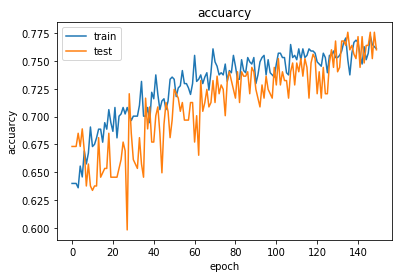

In [4]:
print(history.history.keys())
# 'val_loss', 'val_accuracy', 'loss', 'accuracy'

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuarcy')
plt.ylabel('accuarcy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

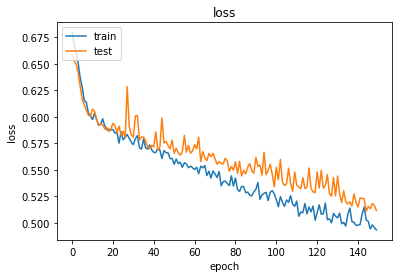

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [30]:
from sklearn.preprocessing import scale
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)
print(X.shape) # 1000x2
print(Y.shape)

(1000, 2)
(1000,)


In [32]:
X

array([[ 1.77780578,  0.60758943],
       [ 1.46176517, -0.4475523 ],
       [-0.8189727 ,  0.60739519],
       ...,
       [-0.15495214, -1.64435644],
       [-0.35557878, -0.34459172],
       [-0.01889003, -1.4519874 ]])

[Text(0, 0.5, 'Y'),
 Text(0.5, 0, 'X'),
 Text(0.5, 1.0, ' binary classification')]

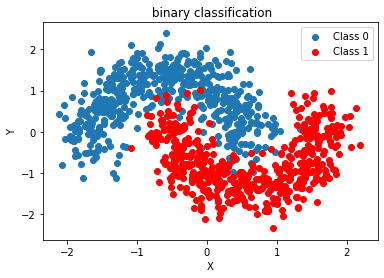

In [7]:
fig,ax = plt.subplots()
ax.scatter(X[Y==0,0], X[Y==0, 1],label='Class 0')
ax.scatter(X[Y==1,0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title=' binary classification')

In [8]:
import keras
# 비선형으로 나타내야 할 듯
# 비선형 모델 - 신경망
model = Sequential()
# 행렬연산 => 설명을 확대 (변수 32 - 설명)
# 100x2 2x32 = 64+32(바이어스개수) = 96 => 1000x32
model.add(Dense(32, input_dim=2, activation='relu'))
# 1000x32 32x1 = 32+1(bias) = 33 => 1000x1
#                가중치가 있으면 bias도 있다.
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='AdaDelta',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])
# callback 함수는 window 자동으로 호출 되는 함수
tb_callback = keras.callbacks.TensorBoard( # graph 이미지 출력
    log_dir = './Graph/model_1',
    histogram_freq=100, write_graph=True,
    write_images=False)
tb_callback.set_model(model) # 콜백을 모델에 등록

In [9]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs = 200,
                verbose=0, validation_data=(X_test, Y_test),
                callbacks=[tb_callback])

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy", score[1])

Test loss:  0.12789358568191528
Test accuracy 0.949999988079071


In [11]:
keras.utils.print_summary(model)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


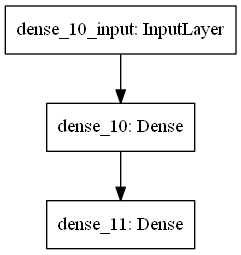

In [12]:
from keras.utils import plot_model
keras.utils.plot_model(model)

In [13]:
%matplotlib inline
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

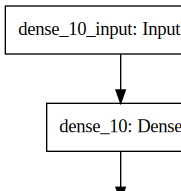

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [15]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [2]:
# Callback class
# customer callback함수의 제작
# 함수에 의해서 호출되는 객체
class CustomHistory(keras.callbacks.Callback): # 상속
    def init(self): # __init__이 아니므로 호출가능
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self, batch, logs={}): # 오버라이딩
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

NameError: name 'keras' is not defined

In [3]:
from keras.datasets import mnist
import matplotlib.pylab as plt

(X_train0, y_train0), (X_test0, y_test0) =mnist.load_data() 
print(X_train0.shape, X_train0.dtype) # 60000, 28x28
print(y_train0.shape, y_train0.dtype)# 60000
print(X_test0.shape, X_test0.dtype) # 10000
print(y_test0.shape, y_test0.dtype) # 10000 

Using TensorFlow backend.
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_21\Anaconda3\envs

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


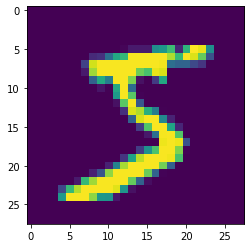

In [4]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()

In [5]:
# fully-connected : flatten : FFNN운
# 이미지 정규화 : 0-255컬러값 / 255 => 0-1
X_train = X_train0.reshape(60000,784).astype('float32')/255.0
X_test = X_test0.reshape(10000,784).astype('float32')/255.0
print(X_train.shape, X_train.dtype) # 60000x784

(60000, 784) float32


In [6]:
# 5,0,4,1,9 : 5(0000010000)
y_train0[:5] # one-hot-encoding 여부 : multi-label => softmax
# softmax는 경우의 수에 대한 확률값

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
from keras.utils import np_utils
# np_utils.to_categorical() 로 원핫인코딩으로 변환
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [11]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
numpy.random.seed(0)
model = Sequential()
# 60000x784, 784x15 => 60000x15
model.add(Dense(15, input_dim=784, activation='sigmoid'))
# 60000x15, 15x10 => 60000x10
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error',metrics=["accuracy"])

In [12]:
model.layers

In [16]:
l1 = model.layers[0]
l2 = model.layers[1]
# 레이어 속성으로 정보 호가인
print(l1.name)
print(l1.input_shape)
print(l1.output_shape)
print(l1.activation)

dense_2
(None, 15)
(None, 10)
<function sigmoid at 0x000002A510FE93A8>


C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.1019 - accuracy: 0.2440 - val_loss: 0.0864 - val_accuracy: 0.3212
Epoch 2/30
 - 1s - loss: 0.0845 - accuracy: 0.3921 - val_loss: 0.0821 - val_accuracy: 0.4409
Epoch 3/30
 - 1s - loss: 0.0796 - accuracy: 0.4997 - val_loss: 0.0765 - val_accuracy: 0.5340
Epoch 4/30
 - 1s - loss: 0.0740 - accuracy: 0.5620 - val_loss: 0.0707 - val_accuracy: 0.5852
Epoch 5/30
 - 1s - loss: 0.0682 - accuracy: 0.6149 - val_loss: 0.0649 - val_accuracy: 0.6522
Epoch 6/30
 - 1s - loss: 0.0625 - accuracy: 0.6759 - val_loss: 0.0594 - val_accuracy: 0.6998
Epoch 7/30
 - 1s - loss: 0.0576 - accuracy: 0.7101 - val_loss: 0.0551 - val_accuracy: 0.7316
Epoch 8/30
 - 1s - loss: 0.0537 - accuracy: 0.7325 - val_loss: 0.0516 - val_accuracy: 0.7485
Epoch 9/30
 - 1s - loss: 0.0505 - accuracy: 0.7474 - val_loss: 0.0486 - val_accuracy: 0.7639
Epoch 10/30
 - 1s - loss: 0.0478 - accuracy: 0.7609 - val_loss: 0.0461 - val_accuracy: 0.7759
Epoch 11/30
 - 1s -

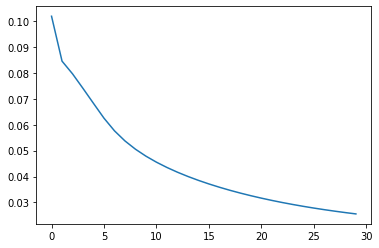

In [25]:
hist = model.fit(X_train, Y_train, nb_epoch=30, batch_size=100,
                validation_data=(X_test, Y_test), verbose=2)
plt.plot(hist.history['loss'])
plt.show()

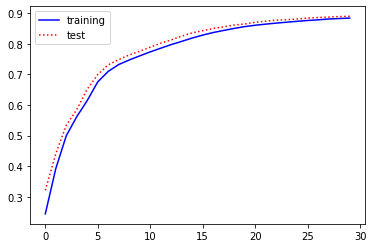

{'batch_size': 100, 'epochs': 30, 'steps': None, 'samples': 60000, 'verbose': 2, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0.24401666, 0.39213333, 0.49971667, 0.56201667, 0.6149167, 0.6759167, 0.7101333, 0.7325, 0.7474167, 0.76085, 0.77395, 0.7858833, 0.79766667, 0.8082833, 0.81918335, 0.82878333, 0.83713335, 0.84403336, 0.8506333, 0.85646665, 0.8609667, 0.8646167, 0.86795, 0.87091666, 0.87381667, 0.87651664, 0.8786833, 0.88136667, 0.8829, 0.8844]
0.8903999924659729


In [26]:
plt.plot(hist.history['accuracy'], 'b-', label='training')
plt.plot(hist.history['val_accuracy'],'r:', label='test')
plt.legend()
plt.show()

print(hist.model)
print(hist.params)
print(hist.history['accuracy'])
print(hist.history['val_accuracy'][29])

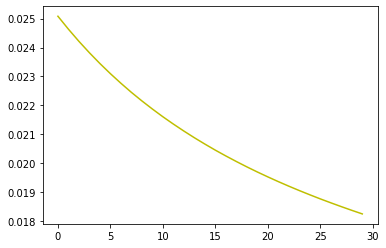

In [29]:
plt.plot(custom_hist.train_loss, 'y', label='train loss')
plt.show()

# 문제 X_test의 이미지 한장의 label을 예측해 보시오.

In [30]:
model.predict(X_test[:1,:])

array([[0.00637829, 0.00547901, 0.00877038, 0.02193788, 0.00460082,
        0.0303109 , 0.00612152, 0.9678394 , 0.00214405, 0.01650386]],
      dtype=float32)

In [31]:
model.predict_classes(X_test[:1,:], verbose=0)

array([7], dtype=int64)

# 문제 : 출력차수가 512인 레이어를 추가하시오

In [33]:
import numpy as np
np.random.seed(0)
model = Sequential()

model.add(Dense(512, input_dim=784, activation = 'sigmoid'))
model.add(Dense(15, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))

model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [34]:
model.layers

In [17]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
# 404x13 404         102x13  102

In [18]:
print(x_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [19]:
model = Sequential()
num_features = 13
model.add(Dense(1, input_dim=num_features, activation='linear'))

In [21]:
model.summary()
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________

Epoch 1/10
404/404 [==============================] - 0s 589us/step - loss: 7023.8776 - mae: 60.6708
Epoch 2/10
404/404 [==============================] - 0s 390us/step - loss: 3311.9345 - mae: 45.0169
Epoch 3/10
404/404 [==============================] - 0s 400us/step - loss: 1605.0191 - mae: 31.9127
Epoch 4/10
404/404 [==============================] - 0s 414us/step - loss: 735.4058 - mae: 21.6749
Epoch 5/10
404/404 [==============================] - 0s 407us/step - loss: 396.4152 - mae: 15.9664
Epoch 6/10
404/404 [==============================] - 0s 411us/step - loss: 263.0387 - mae: 12.7069
Epoch 7/10
404/404 [============================

In [22]:
# accuracy
mse, mae = model.evaluate(x_test, y_test, verbose=False)
rmse = numpy.sqrt(mse)
mse, rmse, mae

(93.70194438859528, 9.679976466324455, 7.531961441040039)

# 문제 : x_test의 앞의 3집을 예측해 보시오

In [25]:
pred = model.predict(x_test[:3,:])
print(pred)

[[ 8.069336]
 [15.050941]
 [23.648577]]


In [26]:
real=y_test[:3]
print(real)

[ 7.2 18.8 19. ]


# 상관계수를 확인하시오

In [27]:
print(pred.shape)
print(real.shape)

(3, 1)
(3,)


In [30]:
pred =pred.reshape(3)
import numpy as np
np.corrcoef(pred,real)

array([[1.        , 0.84264868],
       [0.84264868, 1.        ]])

In [1]:
# scikits -- keras를 연결 : KerasClassifier, KerasRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_21\Anaconda3\envs

In [28]:
def create_model():
    model =Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

np.random.seed(7)
datasets = np.loadtxt('pima.csv', delimiter = ",")
X = dataset[:, 0:8]
Y = dataset[:, 8]
model = KerasClassifier(build_fn = create_model, verbose=0)

In [29]:
batch_size = [10,20,40,60,80,100]
epochs = [10,50,100]

param_grid = dict(batch_size = batch_size, epochs = epochs) # compile에서 수행하는 일
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs =-1 )
grid_result = grid.fit(X,Y)
print("스코어: %f 사용한 조합: %s"%(grid_result.best_score_, grid_result.best_params_))
mean = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(mean, stds, params):
    print("%f (%f) with : %r" %(mean, stdev, param))

스코어: 0.731772 사용한 조합: {'batch_size': 10, 'epochs': 100}
0.592598 (0.069755) with : {'batch_size': 10, 'epochs': 10}
0.684874 (0.025161) with : {'batch_size': 10, 'epochs': 50}
0.731772 (0.039215) with : {'batch_size': 10, 'epochs': 100}
0.563755 (0.098299) with : {'batch_size': 20, 'epochs': 10}
0.675825 (0.037319) with : {'batch_size': 20, 'epochs': 50}
0.660122 (0.019586) with : {'batch_size': 20, 'epochs': 100}
0.584730 (0.073132) with : {'batch_size': 40, 'epochs': 10}
0.703149 (0.015282) with : {'batch_size': 40, 'epochs': 50}
0.673237 (0.043298) with : {'batch_size': 40, 'epochs': 100}
0.483007 (0.084598) with : {'batch_size': 60, 'epochs': 10}
0.632773 (0.031357) with : {'batch_size': 60, 'epochs': 50}
0.681012 (0.032820) with : {'batch_size': 60, 'epochs': 100}
0.535107 (0.067588) with : {'batch_size': 80, 'epochs': 10}
0.669179 (0.037302) with : {'batch_size': 80, 'epochs': 50}
0.681012 (0.027757) with : {'batch_size': 80, 'epochs': 100}
0.452967 (0.107910) with : {'batch_size

- dense2 : 가중치 초기화 (kernel_initializer) 매개변수를 넣고 이름

['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal',
'glorot_uniform', 'he_normal', 'he_uniform']

로 테스트 해서 가장 최적의 가중치 초기화 파라미터를 결정하시오.

- dense1 : activation 함수를 달아주고

['softmax', 'softplus', 'softsign', 'relu', 'tanh',
'sigmoid', 'hard_sigmoid', 'linear']

의 조합중 가장 좋은 activation 함수를 결정하시오.

In [15]:
init_mode =['uniform', 'lecun_uniform', 'normal', 'zero' ,'glorot_normal' ,
                     'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign',' relu','tanh','sigmoid', 'hard_sigmoid','linear']

In [16]:
def create_model(init_mode, activation):
    model = Sequential()
    model.add(Dense(12, input_dim = 8, activation=activation))
    model.add(Dense(1,kernel_initializer = init_mode, activation = 'sigmoid')) # 0 ~ 1
    model.compile(loss = 'binary_crossentropy', optimizer='adam',
                 metrics = ['accuracy'])
    return model
numpy.random.seed(7)
datasets = numpy.loadtxt('pima.csv', delimiter = ",")
X = dataset[:,0:8]
Y = dataset[:,8]
model = KerasClassifier(build_fn= create_model, verbose=0)

In [17]:
# 매개 변수 입력 형태는 dict 
param_grid = dict(init_mode= init_mode, activation = activation) # compile에서 수행하지 않기때문에 매개변수를 입력해 줘야함
grid = GridSearchCV(estimator =model , param_grid = param_grid
                    , n_jobs=-1) # 참여 cpu 개수  
grid_result = grid.fit(X,Y)
print("스코어 : %f 사용한 조합 :%s" % (grid_result.best_score_,
                               grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with : %r" %(mean,stdev,param))

스코어 : 0.652449 사용한 조합 :{'activation': 'softplus', 'init_mode': 'zero'}
0.648544 (0.047819) with : {'activation': 'softmax', 'init_mode': 'uniform'}
0.463271 (0.145905) with : {'activation': 'softmax', 'init_mode': 'lecun_uniform'}
0.608064 (0.090425) with : {'activation': 'softmax', 'init_mode': 'normal'}
0.651159 (0.052445) with : {'activation': 'softmax', 'init_mode': 'zero'}
0.585816 (0.125225) with : {'activation': 'softmax', 'init_mode': 'glorot_normal'}
0.553476 (0.098919) with : {'activation': 'softmax', 'init_mode': 'glorot_uniform'}
0.574221 (0.104729) with : {'activation': 'softmax', 'init_mode': 'he_normal'}
0.459375 (0.091045) with : {'activation': 'softmax', 'init_mode': 'he_uniform'}
0.554647 (0.111991) with : {'activation': 'softplus', 'init_mode': 'uniform'}
0.518386 (0.110589) with : {'activation': 'softplus', 'init_mode': 'lecun_uniform'}
0.647280 (0.060250) with : {'activation': 'softplus', 'init_mode': 'normal'}
0.652449 (0.051355) with : {'activation': 'softplus', 

In [8]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
stopper = EarlyStopping(monitor='var_accuracy', patience=3, verbose=1)
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform',optimizer='relu',dropout_rate=0.1):
# create model
    model = Sequential()
    # 
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation=optimizer))
    model.add(Dropout(dropout_rate)) # 과적합 방지하기 위해서 (계산의 일부분을 생략하여)
    model.add(Dense(1))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
# Earlystopping
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)
# define the grid search parameters
dropout_rate=[0.1,0.2,0.3] # ,0.4,0.5,0.6,0.7,0.8,0.9
init_mode = ['uniform', 'lecun_uniform']# ,'normal','zero','glorot_normal','glorot_uniform','he_normal','he_uniform'
optimizer = ['softmax','relu'] #, 'softplus', 'softsign','tanh','sigmoid','hard_sigmoid','linear'
param_grid = dict(init_mode=init_mode,optimizer=optimizer,dropout_rate=dropout_rate)
fit_params = dict(callbacks=[stopper])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# 변동 매개변수
grid_result = grid.fit(X, Y, **fit_params)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\python\envs\tf_test\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
768/768 [==============================] - 1s 2ms/step - loss: 5.3827 - accuracy: 0.6510
Epoch 2/100
620/768 [=======================>......] - ETA: 0s - loss: 5.6973 - accuracy: 0.6306

C:\python\envs\tf_test\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `var_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


768/768 [==============================] - 0s 252us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 3/100
768/768 [==============================] - 0s 253us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 4/100
768/768 [==============================] - 0s 236us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 5/100
768/768 [==============================] - 0s 266us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 6/100
768/768 [==============================] - 0s 243us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 7/100
768/768 [==============================] - 0s 238us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 8/100
768/768 [==============================] - 0s 246us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 9/100
768/768 [==============================] - 0s 248us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 10/100
768/768 [==============================] - 0s 260us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 11/100
768/768 [==============================] - 0s 239us/step - loss: 5.3827

Epoch 81/100
768/768 [==============================] - 0s 243us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 82/100
768/768 [==============================] - 0s 236us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 83/100
768/768 [==============================] - 0s 256us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 84/100
768/768 [==============================] - 0s 227us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 85/100
768/768 [==============================] - 0s 226us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 86/100
768/768 [==============================] - 0s 236us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 87/100
768/768 [==============================] - 0s 256us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 88/100
768/768 [==============================] - 0s 242us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 89/100
768/768 [==============================] - 0s 227us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 90/100
768/768 [==============================] - 0s 226us

In [2]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas

# 회귀방법

In [9]:
dataframe = pandas.read_csv('housing.csv', delim_whitespace=True, header=None)

dataset = dataframe.values
X = dataset[:,0:13]
Y = dataset[:, 13] # reshape

In [10]:
def baseline_model():
    model = Sequential()
    # shape 506x13 13x13 506x13
    model.add(Dense(13, input_dim = 13, kernel_initializer='normal', activation='relu'))
    # 506x13 13x1 506x1
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [64]:
# deep 해짐
def larger_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal',activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1,kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
def wider_model():
    model = Sequential()
    model.add(Dense(20, input_dim = 13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [11]:
import numpy
seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn = baseline_model, nb_epoch=100, batch_size = 5, verbose=0)

In [12]:
# 10중에 한개는 validation
kfold = KFold(n_splits = 10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv = kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(),results.std()))

Results: -114.56 (82.69) MSE


In [ ]:
results

In [62]:
numpy.random.seed(seed)
estimators = []
estimators.append(('stanardize', StandardScaler()))
estimators.append(('mip', KerasRegressor(build_fn=baseline_model, epochs = 50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators) # train, test 데이터의 전처리를 한번에 할 수 있도록 도와줌
kfold = KFold(n_splits = 10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv = kfold)
print("Standardized: %.2f (%.2f MSE)" % (results.mean(), results.std()))

Standardized: -29.16 (27.51 MSE)


In [63]:
pipeline.fit(X,Y)

Pipeline(memory=None,
         steps=[('stanardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mip',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x000002311B5F74C8>)],
         verbose=False)

In [65]:
res = pipeline.predict(X)
res[0]

29.819115

In [73]:
import numpy as np
np.corrcoef(res, Y)

array([[1.        , 0.91267175],
       [0.91267175, 1.        ]])

# 숙제 
- iris.csv 데이터를 로딩한 다음
- 분류망을 구성하시오.
- parameter tuning을 구현하시오.(pipeline 사용도 함께)